In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
house_file = pd.read_csv('../data/cleaned_complete.csv').drop(['Unnamed: 0','index','dateUpdated','dateListed','geoLocation','geometry', 'index_right', 'SA2_maincode_2021','Population Increase','Earners (persons)','Median age of earners (years)','Male','Female',	'Person','Male Ratio','Female Ratio','Sum ($)','Mean ($)','Median ($)','propertyTypes','surburb','price'],axis = 1)
house_file

,Unnamed: 0.1,bathrooms,bedrooms,carspaces,landAreaSqm,postcode,year,month,bond,rent,...,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population
0,0,1.0,1.0,0.0,NaN,3205,2019,1,NaN,360.0,...,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000
1,1,2.0,2.0,1.0,NaN,3205,2019,1,NaN,725.0,...,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000
2,2,1.0,2.0,0.0,NaN,3205,2019,1,NaN,500.0,...,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000
3,3,1.0,3.0,0.0,NaN,3205,2019,1,NaN,795.0,...,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000
4,4,2.0,2.0,0.0,NaN,3205,2019,1,NaN,825.0,...,6.0,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100634,114955,1.0,3.0,1.0,NaN,3701,2022,5,NaN,280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987
100635,114956,1.0,3.0,1.0,NaN,3701,2022,6,NaN,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987
100636,114957,1.0,3.0,2.0,NaN,3700,2022,8,NaN,470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6181.185987
100637,114958,1.0,3.0,2.0,NaN,3700,2021,3,NaN,310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6153.000000


In [16]:
median_price = house_file.groupby(['bathrooms', 'bedrooms', 'carspaces','year','postcode'],as_index = False)['rent'].median('rent')
median_rent = dict()
for index, values in median_price.iterrows():
    year = values['year']
    bathrooms = values['bathrooms']
    bedrooms = values['bedrooms']
    carspaces = values['carspaces']
    postcode = values['postcode']
    key = postcode+year+bathrooms+bedrooms+carspaces
    median_rent[key] = values['rent']
values_list = []
for item,values in house_file.iterrows():
    year = values['year']
    bathrooms = values['bathrooms']
    bedrooms = values['bedrooms']
    carspaces = values['carspaces']
    postcode = values['postcode']
    key = postcode+year+bathrooms+bedrooms+carspaces
    hit = median_rent[key]
    values_list.append(hit)
house_file['median_rent'] = values_list 
house_file = house_file[house_file['rent'] <= 1.5 * house_file['median_rent']]
house_file

,Unnamed: 0.1,bathrooms,bedrooms,carspaces,landAreaSqm,postcode,year,month,bond,rent,...,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,median_rent
0,0,1.0,1.0,0.0,NaN,3205,2019,1,NaN,360.0,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,790.0
1,1,2.0,2.0,1.0,NaN,3205,2019,1,NaN,725.0,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,565.0
2,2,1.0,2.0,0.0,NaN,3205,2019,1,NaN,500.0,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,570.0
3,3,1.0,3.0,0.0,NaN,3205,2019,1,NaN,795.0,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,580.0
4,4,2.0,2.0,0.0,NaN,3205,2019,1,NaN,825.0,...,1.0,0.0,8.0,16.0,10.0,5.0,22895.0,17201.0,12753.000000,580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100634,114955,1.0,3.0,1.0,NaN,3701,2022,5,NaN,280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,500.0
100635,114956,1.0,3.0,1.0,NaN,3701,2022,6,NaN,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,302.0,230.0,6181.185987,500.0
100636,114957,1.0,3.0,2.0,NaN,3700,2022,8,NaN,470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6181.185987,500.0
100637,114958,1.0,3.0,2.0,NaN,3700,2021,3,NaN,310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,605.0,484.0,6153.000000,490.0


In [17]:
postcode_count = pd.DataFrame(house_file['postcode'].value_counts()).reset_index().rename({"index":"postcode",'postcode':'count'},axis = 1)
postcode_count

,postcode,count
0,3000,8652
1,3008,4253
2,3006,3066
3,3029,2823
4,3141,2552
...,...,...
461,3890,1
462,3453,1
463,3221,1
464,3870,1


In [18]:
df = house_file.groupby(['bathrooms','bedrooms','carspaces','postcode','year','month'],as_index= False).mean(['rent','distance of the closest bus stop','distance of the closest train stop','distance of the closest tram stop','distance of the closest vline stop','distance of the closest school','distance to the closest shopping mall']).drop(['landAreaSqm','longitude', 'latitude','median_rent','bond'],axis = 1)
df

,bathrooms,bedrooms,carspaces,postcode,year,month,Unnamed: 0.1,rent,distance of the closest bus stop,count of bus stop,...,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population
0,0.0,1.0,0.0,3008,2019,12,30354.0,850.0,0.456268,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25125.0,18185.0,16375.000000
1,0.0,1.0,0.0,3015,2019,10,70713.0,250.0,0.370457,60.0,...,14.0,19.0,0.0,10.0,67.0,26.0,40.0,10604.0,8777.0,19243.000000
2,0.0,1.0,0.0,3053,2022,5,14761.0,175.0,0.449442,39.0,...,4.0,6.0,0.0,8.0,19.0,8.0,24.0,20238.0,15867.0,16701.220181
3,0.0,1.0,0.0,3079,2022,3,46310.0,300.0,0.516233,48.0,...,3.0,3.0,0.0,0.0,20.0,14.0,42.0,9248.0,7527.0,12678.988491
4,0.0,1.0,0.0,3171,2020,2,90912.0,460.0,0.642444,64.0,...,1.0,1.0,0.0,0.0,5.0,4.0,12.0,22113.0,16777.0,23636.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44166,4.0,5.0,4.0,3064,2021,11,101139.0,540.0,0.386602,209.0,...,11.0,24.0,1.0,77.0,119.0,48.0,190.0,55237.0,41689.0,22005.000000
44167,4.0,5.0,4.0,3133,2020,10,65278.0,900.0,0.642555,64.0,...,1.0,1.0,0.0,0.0,4.0,0.0,2.0,7751.0,5998.0,11324.000000
44168,4.0,5.0,4.0,3335,2022,6,79505.0,650.0,0.129284,10.0,...,1.0,4.0,0.0,140.0,48.0,30.0,56.0,4762.0,3843.0,25309.447163
44169,4.0,5.0,4.0,3844,2019,8,110872.0,570.0,1.741227,124.0,...,0.0,0.0,0.0,0.0,4.0,3.0,3.0,42754.0,29717.0,16489.000000


In [19]:
df2 = house_file.groupby(['bathrooms','bedrooms','carspaces','postcode'],as_index= False).mean(['rent','distance of the closest bus stop','distance of the closest train stop','distance of the closest tram stop','distance of the closest vline stop','distance of the closest school','distance to the closest shopping mall',]).drop(['landAreaSqm','longitude', 'latitude','median_rent','bond','year','month','Population '],axis = 1)
df2

,bathrooms,bedrooms,carspaces,postcode,Unnamed: 0.1,rent,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,...,restaurant,place_of_worship,school,university,garden,park,playground,pitch,offence count,incidents recorded
0,0.0,1.0,0.0,3008,30354.0,850.0,0.456268,5.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25125.0,18185.0
1,0.0,1.0,0.0,3015,70713.0,250.0,0.370457,60.0,0.405244,2.0,...,24.0,14.0,19.0,0.0,10.0,67.0,26.0,40.0,10604.0,8777.0
2,0.0,1.0,0.0,3053,14761.0,175.0,0.449442,39.0,NaN,0.0,...,13.0,4.0,6.0,0.0,8.0,19.0,8.0,24.0,20238.0,15867.0
3,0.0,1.0,0.0,3079,46310.0,300.0,0.516233,48.0,0.526467,2.0,...,17.0,3.0,3.0,0.0,0.0,20.0,14.0,42.0,9248.0,7527.0
4,0.0,1.0,0.0,3171,90912.0,460.0,0.642444,64.0,0.670534,2.0,...,0.0,1.0,1.0,0.0,0.0,5.0,4.0,12.0,22113.0,16777.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6862,4.0,5.0,4.0,3064,101139.0,540.0,0.386602,209.0,0.457571,2.0,...,18.0,11.0,24.0,1.0,77.0,119.0,48.0,190.0,55237.0,41689.0
6863,4.0,5.0,4.0,3133,65278.0,900.0,0.642555,64.0,NaN,0.0,...,0.0,1.0,1.0,0.0,0.0,4.0,0.0,2.0,7751.0,5998.0
6864,4.0,5.0,4.0,3335,79505.0,650.0,0.129284,10.0,NaN,0.0,...,11.0,1.0,4.0,0.0,140.0,48.0,30.0,56.0,4762.0,3843.0
6865,4.0,5.0,4.0,3844,110872.0,570.0,1.741227,124.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,3.0,3.0,42754.0,29717.0


In [20]:
df_combined = df.merge(postcode_count,  on = 'postcode', how = 'left').fillna(0)
df_combined

,bathrooms,bedrooms,carspaces,postcode,year,month,Unnamed: 0.1,rent,distance of the closest bus stop,count of bus stop,...,school,university,garden,park,playground,pitch,offence count,incidents recorded,Population,count
0,0.0,1.0,0.0,3008,2019,12,30354.0,850.0,0.456268,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,25125.0,18185.0,16375.000000,4253
1,0.0,1.0,0.0,3015,2019,10,70713.0,250.0,0.370457,60.0,...,19.0,0.0,10.0,67.0,26.0,40.0,10604.0,8777.0,19243.000000,295
2,0.0,1.0,0.0,3053,2022,5,14761.0,175.0,0.449442,39.0,...,6.0,0.0,8.0,19.0,8.0,24.0,20238.0,15867.0,16701.220181,1280
3,0.0,1.0,0.0,3079,2022,3,46310.0,300.0,0.516233,48.0,...,3.0,0.0,0.0,20.0,14.0,42.0,9248.0,7527.0,12678.988491,269
4,0.0,1.0,0.0,3171,2020,2,90912.0,460.0,0.642444,64.0,...,1.0,0.0,0.0,5.0,4.0,12.0,22113.0,16777.0,23636.000000,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44166,4.0,5.0,4.0,3064,2021,11,101139.0,540.0,0.386602,209.0,...,24.0,1.0,77.0,119.0,48.0,190.0,55237.0,41689.0,22005.000000,1482
44167,4.0,5.0,4.0,3133,2020,10,65278.0,900.0,0.642555,64.0,...,1.0,0.0,0.0,4.0,0.0,2.0,7751.0,5998.0,11324.000000,232
44168,4.0,5.0,4.0,3335,2022,6,79505.0,650.0,0.129284,10.0,...,4.0,0.0,140.0,48.0,30.0,56.0,4762.0,3843.0,25309.447163,237
44169,4.0,5.0,4.0,3844,2019,8,110872.0,570.0,1.741227,124.0,...,0.0,0.0,0.0,4.0,3.0,3.0,42754.0,29717.0,16489.000000,214


In [112]:
cpi_df = pd.read_csv('../data/cpi.csv')
df_combined = df_combined.merge(cpi_df, on = 'year')

In [114]:
xls = pd.ExcelFile('../data/gdp.xlsx')
df1 = pd.read_excel(xls, 'Data')[36:].drop('Unnamed: 0', axis = 1).rename({'Unnamed: 1':'year','Unnamed: 2':'gdp'},axis = 1).reset_index().drop('index',axis = 1)
gdp_list = list(df1['gdp'])
l = []
m = 0
for i in range(2019,2026):
    l.append([i,gdp_list[m]])
    m = m+1
gdp_df = pd.DataFrame(l, columns=['year','gdp'])
gdp_df

,year,gdp
0,2019,54254.86
1,2020,52847.68
2,2021,63529.29
3,2022,67464.39
4,2023,69717.12
5,2024,72187.63
6,2025,74353.74


In [115]:
df_combined = df_combined.merge(gdp_df, on = 'year')
df_combined

,bathrooms,bedrooms,carspaces,postcode,year,month,Unnamed: 0.1,rent,distance of the closest bus stop,count of bus stop,...,park,playground,pitch,offence count,incidents recorded,Population,count,Unnamed: 0,cpi,gdp
0,0.0,1.0,0.0,3008,2019,12,30354.0,850.0,0.456268,5.0,...,1.0,0.0,0.0,25125.0,18185.0,16375.0,4253,0,255.65,54254.86
1,0.0,1.0,0.0,3015,2019,10,70713.0,250.0,0.370457,60.0,...,67.0,26.0,40.0,10604.0,8777.0,19243.0,295,0,255.65,54254.86
2,0.0,1.0,1.0,3070,2019,1,47271.0,320.0,0.456507,52.0,...,14.0,14.0,51.0,18550.0,15386.0,16150.0,406,0,255.65,54254.86
3,0.0,1.0,1.0,3216,2019,1,94243.0,200.0,0.471810,204.0,...,52.0,36.0,48.0,29156.0,22993.0,14956.0,195,0,255.65,54254.86
4,0.0,2.0,0.0,3125,2019,2,58853.0,190.0,0.575747,38.0,...,0.0,0.0,0.0,8589.0,6487.0,13447.0,299,0,255.65,54254.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44166,4.0,5.0,2.0,3187,2021,2,34615.0,900.0,0.516307,44.0,...,16.0,12.0,52.0,6053.0,4527.0,16695.0,149,2,264.71,63529.29
44167,4.0,5.0,2.0,3551,2021,7,111285.0,620.0,0.949961,115.0,...,31.0,10.0,56.0,9938.0,7363.0,8306.0,110,2,264.71,63529.29
44168,4.0,5.0,3.0,3032,2021,4,68880.0,700.0,0.363339,67.0,...,92.0,44.0,72.0,30292.0,24502.0,12715.0,490,2,264.71,63529.29
44169,4.0,5.0,3.0,3116,2021,2,106636.0,900.0,0.778759,20.0,...,12.0,8.0,24.0,6407.0,4736.0,11873.0,60,2,264.71,63529.29


In [116]:
X = df_combined.drop('rent',axis=1)
y = df_combined['rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [117]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [118]:
regr = MLPRegressor(max_iter=500).fit(X_train_std, y_train)
regr.score(X_test_std, y_test)

/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.7587743766779087

In [120]:
rfc = RandomForestRegressor(n_estimators=100)  
rfc = rfc.fit(X_train_std, y_train)
print(f'model score on training data: {rfc.score(X_train_std, y_train)}')
print(f'model score on testing data: {rfc.score(X_test_std, y_test)}')

model score on training data: 0.9743837467254423
model score on testing data: 0.8064587442517379


In [121]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rfc, X_train_std, y_train, n_repeats=5, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df_combined.columns[i]:<8}"
        f"{r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

Unnamed: 0.10.817 +/- 0.004
bedrooms0.671 +/- 0.005
bathrooms0.303 +/- 0.002
postcode0.104 +/- 0.001
rent    0.068 +/- 0.001
distance of the closest bus stop0.066 +/- 0.001
carspaces0.063 +/- 0.001
count of vline stop0.054 +/- 0.000
incidents recorded0.036 +/- 0.000
count of train stop0.033 +/- 0.000
month   0.029 +/- 0.000
distance of the closest tram stop0.024 +/- 0.000
Population 0.020 +/- 0.000
count of bus stop0.017 +/- 0.000
count of hospital0.011 +/- 0.000
pitch   0.011 +/- 0.000
year    0.010 +/- 0.000
Unnamed: 00.010 +/- 0.000
count of tram stop0.009 +/- 0.000
count   0.009 +/- 0.000
cpi     0.009 +/- 0.000
offence count0.007 +/- 0.000
playground0.004 +/- 0.000
distance of the closest train stop0.004 +/- 0.000
distance of the closest school0.004 +/- 0.000
kindergarten0.004 +/- 0.000
count of shopping mall0.004 +/- 0.000
parking 0.003 +/- 0.000
bench   0.003 +/- 0.000
garden  0.003 +/- 0.000
park    0.002 +/- 0.000
place_of_worship0.002 +/- 0.000
university0.002 +/- 0.000
dista

In [122]:
xgbc = xgb.XGBRegressor(
    learning_rate = 0.1,
    n_estimators = 1000,
    max_depth = 4,
)
xgbc.fit(
    X_train, 
    y_train, 
    eval_set = [(X_train, y_train), (X_test, y_test)]
)
fea_imp = xgbc.feature_importances_
print(fea_imp)

[0]	validation_0-rmse:450.92484	validation_1-rmse:449.24995
[1]	validation_0-rmse:408.07370	validation_1-rmse:406.60500
[2]	validation_0-rmse:369.71237	validation_1-rmse:368.37535
[3]	validation_0-rmse:335.39191	validation_1-rmse:334.25968
[4]	validation_0-rmse:304.70242	validation_1-rmse:303.74000
[5]	validation_0-rmse:277.31357	validation_1-rmse:276.50678
[6]	validation_0-rmse:252.80950	validation_1-rmse:252.13652
[7]	validation_0-rmse:231.01681	validation_1-rmse:230.38466
[8]	validation_0-rmse:211.65352	validation_1-rmse:211.15519
[9]	validation_0-rmse:194.45163	validation_1-rmse:194.13269
[10]	validation_0-rmse:179.22870	validation_1-rmse:179.02667
[11]	validation_0-rmse:165.80255	validation_1-rmse:165.73251
[12]	validation_0-rmse:153.98310	validation_1-rmse:154.04229
[13]	validation_0-rmse:143.60980	validation_1-rmse:143.75602
[14]	validation_0-rmse:134.56438	validation_1-rmse:134.84976
[15]	validation_0-rmse:126.71418	validation_1-rmse:127.11906
[16]	validation_0-rmse:119.82624	v

In [123]:
xgbc.score(X_test_std, y_test)

-1.0856534086494611

<Axes:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

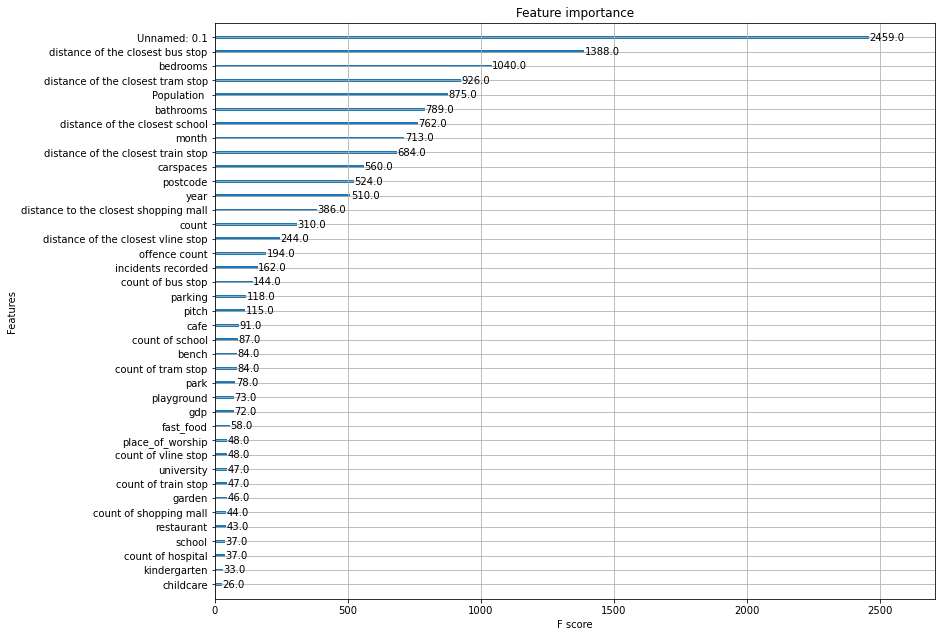

In [124]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_axes([0,0,1,1])
xgb.plot_importance(xgbc, ax)

In [125]:
df3 = pd.DataFrame()
for year in range(2023,2026):
    for month in range(1,13):
        tmp_df = df2.copy()
        year_list = [year]*len(df2)
        month_list = [month]*len(df2)
        tmp_df['year'] = year_list
        tmp_df['month'] = month_list
        df3= pd.concat([df3,tmp_df])
df3 = df3.reset_index().drop('index',axis = 1)
df3 = df3.drop('rent', axis = 1)

In [126]:
population = pd.read_csv('../data/population_forcasting.csv')
population_count = dict()
population['Postcode'] = population['Postcode'].fillna(value=0)
for index, value in population.iterrows():
    postcode = int(value['Postcode'])
    year = value['year']
    key = str(postcode)+ ' ' + str(year)
    population_count[key] = value['Total']

In [127]:
population_list = []
for index, value in df3.iterrows():
    postcode = int(value['postcode'])
    year = int(value['year'])
    key = str(postcode)+ ' ' + str(year)
    try: 
        count = population_count[key]
        population_list.append(count)
    except:
        population_list.append(None)
df3['population'] = population_list

In [128]:
cpi_df = pd.read_csv('../data/cpi.csv')
df3 = df3.merge(cpi_df, on = 'year', how='left')

In [129]:
import json
f = open("../data/year_school_address.txt")
data = json.load(f)
new_school = pd.DataFrame(data, columns=['year','link','address'])
new_school

,year,link,address
0,2024,http://www.schoolbuildings.vic.gov.au/aintree-...,40 Recreation Drive Aintree 3335
1,2024,http://www.schoolbuildings.vic.gov.au/aintree-...,42 Recreation Drive Aintree 3335
2,2024,http://www.schoolbuildings.vic.gov.au/alexande...,451 Hardys Rd Clyde North 3978
3,2024,http://www.schoolbuildings.vic.gov.au/black-fo...,10 Elementary Rd Mambourin 3024
4,2024,http://www.schoolbuildings.vic.gov.au/brookfie...,Brookfield 3338
...,...,...,...
70,2019,http://www.schoolbuildings.vic.gov.au/pakenham...,50 Atlantic Drive Pakenham 3810
71,2019,http://www.schoolbuildings.vic.gov.au/prahran-...,138 High Street Windsor 3181
72,2019,http://www.schoolbuildings.vic.gov.au/preston-...,Cooma St Preston 3072
73,2019,http://www.schoolbuildings.vic.gov.au/saltwate...,Saltwater Promenade Point Cook 3030


In [130]:
def get_postcode(add):
    add_list = add.split(' ')
    return add_list[-1]
new_school['postcode'] = new_school['address'].apply(get_postcode)
new_school

,year,link,address,postcode
0,2024,http://www.schoolbuildings.vic.gov.au/aintree-...,40 Recreation Drive Aintree 3335,3335
1,2024,http://www.schoolbuildings.vic.gov.au/aintree-...,42 Recreation Drive Aintree 3335,3335
2,2024,http://www.schoolbuildings.vic.gov.au/alexande...,451 Hardys Rd Clyde North 3978,3978
3,2024,http://www.schoolbuildings.vic.gov.au/black-fo...,10 Elementary Rd Mambourin 3024,3024
4,2024,http://www.schoolbuildings.vic.gov.au/brookfie...,Brookfield 3338,3338
...,...,...,...,...
70,2019,http://www.schoolbuildings.vic.gov.au/pakenham...,50 Atlantic Drive Pakenham 3810,3810
71,2019,http://www.schoolbuildings.vic.gov.au/prahran-...,138 High Street Windsor 3181,3181
72,2019,http://www.schoolbuildings.vic.gov.au/preston-...,Cooma St Preston 3072,3072
73,2019,http://www.schoolbuildings.vic.gov.au/saltwate...,Saltwater Promenade Point Cook 3030,3030


In [131]:
school_dict = {}
for index, value in new_school.iterrows():
    year = value['year']
    postcode = value['postcode']
    key = year + ' ' + postcode
    if key not in school_dict.keys():
        school_dict[key] = 1
    else:
        school_dict[key] += 1

In [132]:
for index, values in df3.iterrows():
    year = str(values['year'])
    postcode = str(values['postcode'])
    key = year + ' ' + postcode
    if key in school_dict.keys():
        school_values = values['school']
        print(school_values)
        df3.loc[index,'school'] = school_values + school_dict[key]


In [133]:
df3 = df3.merge(gdp_df, on = 'year', how='left')
df3 = df3.fillna(0)

In [136]:
df3 = df3.merge(postcode_count,  on = 'postcode', how = 'left')
df3

,bathrooms,bedrooms,carspaces,postcode,Unnamed: 0.1,distance of the closest bus stop,count of bus stop,distance of the closest train stop,count of train stop,distance of the closest tram stop,...,offence count,incidents recorded,year,month,population,Unnamed: 0,cpi,gdp,count_x,count_y
0,0.0,1.0,0.0,3008,30354.0,0.456268,5.0,0.000000,0.0,0.433269,...,25125.0,18185.0,2023,1,0.0,4,277.84,69717.12,4253,4253
1,0.0,1.0,0.0,3015,70713.0,0.370457,60.0,0.405244,2.0,0.000000,...,10604.0,8777.0,2023,1,29726.0,4,277.84,69717.12,295,295
2,0.0,1.0,0.0,3053,14761.0,0.449442,39.0,0.000000,0.0,0.452666,...,20238.0,15867.0,2023,1,0.0,4,277.84,69717.12,1280,1280
3,0.0,1.0,0.0,3079,46310.0,0.516233,48.0,0.526467,2.0,0.000000,...,9248.0,7527.0,2023,1,8946.0,4,277.84,69717.12,269,269
4,0.0,1.0,0.0,3171,90912.0,0.642444,64.0,0.670534,2.0,0.000000,...,22113.0,16777.0,2023,1,9676.0,4,277.84,69717.12,170,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247207,4.0,5.0,4.0,3064,101139.0,0.386602,209.0,0.457571,2.0,0.000000,...,55237.0,41689.0,2025,12,25571.0,6,291.50,74353.74,1482,1482
247208,4.0,5.0,4.0,3133,65278.0,0.642555,64.0,0.000000,0.0,0.645158,...,7751.0,5998.0,2025,12,15127.0,6,291.50,74353.74,232,232
247209,4.0,5.0,4.0,3335,79505.0,0.129284,10.0,0.000000,0.0,0.000000,...,4762.0,3843.0,2025,12,17873.0,6,291.50,74353.74,237,237
247210,4.0,5.0,4.0,3844,110872.0,1.741227,124.0,0.000000,0.0,0.000000,...,42754.0,29717.0,2025,12,8396.0,6,291.50,74353.74,214,214


In [137]:
df3 = df3.drop('count_x', axis  = 1).rename({'count_y':'count'}, axis = 1)

In [138]:
predict_std = sc.transform(df3)
rent_list = rfc.predict(predict_std)

/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- population
Feature names seen at fit time, yet now missing:
- Population 

  warnings.warn(message, FutureWarning)


In [140]:
df3['predicted_rent'] = rent_list
df3.to_csv('../data/curated/predicted_df.csv')

In [141]:
import pandas as pd
df3 = pd.read_csv('../data/curated/predicted_df.csv')

In [50]:
df3.to_csv('../data/curated/predicted_df.csv')

In [142]:
suburb_postcode_df = pd.read_csv('../data/cleaned_complete.csv')[['postcode','surburb']]
df3_combinded = df3.merge(suburb_postcode_df, on = 'postcode', how = 'left')
df3_combinded.to_csv('../data/curated/predicted_df.csv')

In [ ]:
suburb_mean_rent = pd.DataFrame(df3.groupby(['year','surburb']).mean('predicted_rent')['predicted_rent']).reset_index().rename({'predicted_rent':'rent'}, axis = 1)
suburb_mean_rent

,year,postcode,rent
0,2023,3000,670.557205
1,2023,3002,646.213999
2,2023,3003,671.313133
3,2023,3004,652.234889
4,2023,3006,659.452140
...,...,...,...
1393,2025,3977,760.634690
1394,2025,3978,763.150785
1395,2025,3980,744.510675
1396,2025,3981,770.231533


In [111]:
history_rent = pd.DataFrame(house_file.groupby(['year','postcode']).mean('rent')['rent']).reset_index()
history_rent[history_rent['postcode'] == 3854]

,year,postcode,rent
340,2019,3854,270.0
733,2020,3854,182.5
1463,2022,3854,250.0


In [107]:
combined_rent = pd.concat([history_rent, suburb_mean_rent])
combined_rent = combined_rent.sort_values(by = ['postcode','year'])
yearly_growth_list = []
for name, group in combined_rent.groupby('postcode'):   
    group['lag(rent,1)'] = group['rent'].shift(1)
    growth_dict = dict()
    growth_dict['postcode'] = name
    for index, value in group.iterrows():
        rent = value['rent']
        lag = value['lag(rent,1)']
        rate = 0
        if pd.isna(lag):
            rete = None
        else:
            rate = (rent-lag)/lag *100
        growth_dict['year'+ ' ' + str(int(value['year']))] = rate
    yearly_growth_list.append(growth_dict)


In [110]:
rate_df = pd.DataFrame(yearly_growth_list)
rate_df.sort_values(by = ['year 2020','year 2021', 'year 2022','year 2023','year 2024', 'year 2025'])

,postcode,year 2019,year 2020,year 2021,year 2022,year 2023,year 2024,year 2025
410,3854,0.0,-32.407407,NaN,36.986301,137.386543,0.000000,0.000000
249,3352,0.0,-27.698574,15.059588,2.335217,88.016430,1.718766,0.589567
328,3659,0.0,-25.000000,NaN,11.666667,104.700442,0.000000,0.000000
450,3937,0.0,-24.865350,51.189312,-7.623922,-0.206831,0.000000,0.000000
4,3006,0.0,-24.768471,-15.592064,20.351358,21.050213,0.000000,0.000000
...,...,...,...,...,...,...,...,...
256,3373,0.0,NaN,NaN,NaN,253.910721,0.000000,0.000000
306,3566,0.0,NaN,NaN,NaN,284.006944,0.000000,0.000000
349,3728,0.0,NaN,NaN,NaN,290.391880,0.000000,0.000000
260,3390,0.0,NaN,NaN,NaN,292.014632,0.000000,0.000000


In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2019,2026),)